# Question 2 - Tezpur University Android Malware Dataset

## Task A: Dataset Curation and Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
from sklearn.model_selection import train_test_split
#import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

C:\Users\Samantha\anaconda_work\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Samantha\anaconda_work\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [5]:
# Import data 

malware = pd.read_csv('TUANDROMD.csv')
malware.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


In [6]:
# Drop rows with NaN in any column
malware = malware.dropna()

In [7]:
malware.isna().any().any()

False

In [8]:
malware[malware.isna().any(axis=1)]

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label


### 1. Describe and implement preprocessing steps specific to this problem, including strategies for handling imbalanced classes, encoding categorical variables, and any data transformation techniques applied

In [10]:
from sklearn.preprocessing import OneHotEncoder

# Categorical variable should be encoded to have their own columns 

encoder = OneHotEncoder(sparse_output=False)  
cols = ['Label'] 

# transform categorical features
encoded_data = encoder.fit_transform(malware[cols])
encoded_malware = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cols))

malware = pd.concat([malware.drop(columns=cols), encoded_malware], axis=1)

malware.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label_goodware,Label_malware
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Since the dataset is preprocessed with all binary features and no missing values to begin with, we explore any class imbalances and ensure any categorical variables are encoded. 

In [11]:
target_columns = ['Label_goodware', 'Label_malware']

# Check the distribution of each target 
target_distribution = malware[target_columns].sum()
print("Class distribution (sum of each column):\n", target_distribution)

Class distribution (sum of each column):
 Label_goodware     899.0
Label_malware     3565.0
dtype: float64


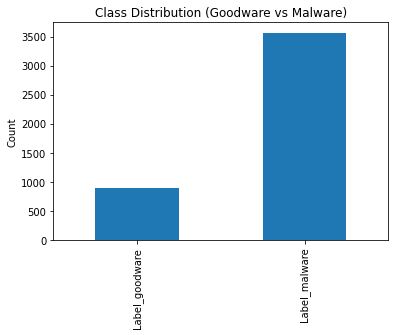

In [12]:
import matplotlib.pyplot as plt

# Plot the class distribution
target_distribution.plot(kind='bar', title="Class Distribution (Goodware vs Malware)")
plt.ylabel('Count')
plt.show()

The distribution shows that this is a highly imbalanced dataset with the minority class being goodware which only makes up only a small percentage of the total dataset. Therefore, we implement SMOTE to create artificial minority instances. 

In [13]:
#!pip install imbalanced-learn

In [14]:
import imblearn

In [15]:
# separate the features and target 
X = malware.drop(columns=['Label_goodware', 'Label_malware'])  # Features
y = malware[['Label_goodware', 'Label_malware']]  # Target columns (goodware and malware)

# verify the shapes of X and y
print(X.shape)
print(y.shape)

(4465, 241)
(4465, 2)


In [16]:
# Drop rows containing NA values in the target columns 
y_clean = y.dropna()

# Convert one-hot encoded columns into a single class label after cleaning
y_class = y_clean.idxmax(axis=1, skipna=True)

# Check the first few rows of the class labels
print(y_class.head())

0    Label_malware
1    Label_malware
2    Label_malware
3    Label_malware
4    Label_malware
dtype: object


In [19]:
# Ensure X corresponds to y_clean
X_clean = X.loc[y_clean.index] 

In [20]:
# Remove rows with NA in features
X_clean = X_clean.dropna() 

In [21]:
# Check for NA in features
print(X_clean.isna().sum()) 

ACCESS_ALL_DOWNLOADS                                        0
ACCESS_CACHE_FILESYSTEM                                     0
ACCESS_CHECKIN_PROPERTIES                                   0
ACCESS_COARSE_LOCATION                                      0
ACCESS_COARSE_UPDATES                                       0
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperator        0
Landroid/telephony/TelephonyManager;->getSimOperatorName    0
Landroid/telephony/TelephonyManager;->getSimCountryIso      0
Landroid/telephony/TelephonyManager;->getSimSerialNumber    0
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    0
Length: 241, dtype: int64


In [22]:
# Check for NA in the feature set (X_clean)
print(X_clean.isna().sum())

ACCESS_ALL_DOWNLOADS                                        0
ACCESS_CACHE_FILESYSTEM                                     0
ACCESS_CHECKIN_PROPERTIES                                   0
ACCESS_COARSE_LOCATION                                      0
ACCESS_COARSE_UPDATES                                       0
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperator        0
Landroid/telephony/TelephonyManager;->getSimOperatorName    0
Landroid/telephony/TelephonyManager;->getSimCountryIso      0
Landroid/telephony/TelephonyManager;->getSimSerialNumber    0
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    0
Length: 241, dtype: int64


In [23]:
X_clean = X_clean.dropna()  # Remove rows with NaN values
y_clean = y_class[X_clean.index]  # Align the target labels

In [24]:
y_clean = y_class[X_clean.index]  # Ensure y_class matches X_clean

In [25]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled_class = smote.fit_resample(X_clean, y_clean)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_resampled_class).value_counts())


Class distribution after SMOTE:
 Label_malware     3565
Label_goodware    3565
Name: count, dtype: int64


In [26]:
import pandas as pd

# Convert the target to a df 
y_resampled_class_df = pd.DataFrame(y_resampled_class, columns=['Label'])

# Create one-hot encoding for the target
y_resampled_class_df = pd.get_dummies(y_resampled_class_df['Label'])

# Convert True/False to 1/0 in the one-hot encoded df
y_resampled_class_df = y_resampled_class_df.astype(int)

# combine the resampled features and the one-hot encoded target
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)  # Convert X_resampled to DataFrame with feature names
final_resampled_df = pd.concat([X_resampled_df, y_resampled_class_df], axis=1)

# Check the first few rows of the final resampled dataset
final_resampled_df.head()


,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label_goodware,Label_malware
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [109]:
# Export to csv
final_resampled_df.to_csv('data/preprocessed/malware_preprocessed.csv', index=False)

### 2. Conduct exploratory data analysis (EDA) to uncover insights related to class distributions, feature correlations, and potential predictors of interest (Tip: consider applying PCA). Summarize key findings that could influence model selection and tuning.

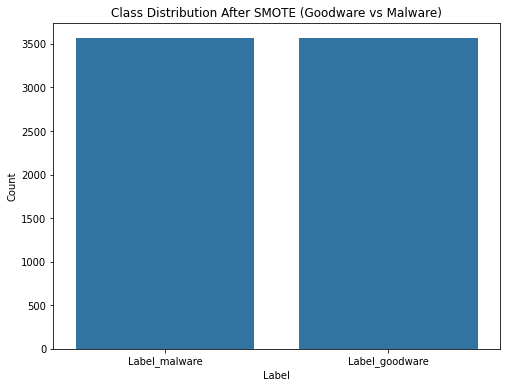

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target classes after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled_class)
plt.title('Class Distribution After SMOTE (Goodware vs Malware)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


Dataset has balances goodware and malware values - successfully addressed class imbalance with SMOTE

In [28]:
# calculate correlations with the target columns (Label_goodware and Label_malware)
correlation_goodware = final_resampled_df.corrwith(final_resampled_df['Label_goodware'])
correlation_malware = final_resampled_df.corrwith(final_resampled_df['Label_malware'])

# Display the correlations
print("Correlation with Label_goodware:\n", correlation_goodware)
print("Correlation with Label_malware:\n", correlation_malware)

C:\Users\Samantha\anaconda_work\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Samantha\anaconda_work\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation with Label_goodware:
 ACCESS_ALL_DOWNLOADS                                        0.040631
ACCESS_CACHE_FILESYSTEM                                     0.054330
ACCESS_CHECKIN_PROPERTIES                                  -0.055634
ACCESS_COARSE_LOCATION                                      0.263203
ACCESS_COARSE_UPDATES                                      -0.066082
                                                              ...   
Landroid/telephony/TelephonyManager;->getSimCountryIso      0.217161
Landroid/telephony/TelephonyManager;->getSimSerialNumber    0.082261
Lorg/apache/http/impl/client/DefaultHttpClient;->execute   -0.005073
Label_goodware                                              1.000000
Label_malware                                              -1.000000
Length: 243, dtype: float64
Correlation with Label_malware:
 ACCESS_ALL_DOWNLOADS                                       -0.040631
ACCESS_CACHE_FILESYSTEM                                    -0.054330
ACCESS_C

In [29]:
# Filter the correlation to show only the highest correlations
top_corr_goodware = correlation_goodware[correlation_goodware.abs() > 0.5]  
top_corr_malware = correlation_malware[correlation_malware.abs() > 0.5] 

print("Top Correlations with Label_goodware:\n", top_corr_goodware)
print("Top Correlations with Label_malware:\n", top_corr_malware)

Top Correlations with Label_goodware:
 GET_TASKS                                                        -0.695699
KILL_BACKGROUND_PROCESSES                                        -0.579695
RECEIVE_BOOT_COMPLETED                                           -0.749843
Ljava/net/URL;->openConnection                                    0.713179
Landroid/location/LocationManager;->getLastKgoodwarewnLocation    0.601059
Label_goodware                                                    1.000000
Label_malware                                                    -1.000000
dtype: float64
Top Correlations with Label_malware:
 GET_TASKS                                                         0.695699
KILL_BACKGROUND_PROCESSES                                         0.579695
RECEIVE_BOOT_COMPLETED                                            0.749843
Ljava/net/URL;->openConnection                                   -0.713179
Landroid/location/LocationManager;->getLastKgoodwarewnLocation   -0.601059
Label_go

According to the top correlated features with goodware and malware, variables such as GET_TASKS, KILL_BACKGROUND_PROCESSES, and RECEIVE_BOOT_COMPLETED are highly correlated with malware wince applications might use these functions to spy on users, kill background processes to prevent security apps, or allow apps to launch when a device boots and reboots up. On the other hand, legitimate apps use functions like Ljava/net/URL;->openConnection and Landroid/location/LocationManager;->getLastKgoodwarewnLocation for common internet communication and fair use of location services for things like maps or ride-share. 

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Compute VIF
vif_df = calculate_vif(final_resampled_df)

# Identify features with infinite or very high VIF (indicating perfect collinearity)
perfect_collinear_features = vif_df[vif_df["VIF"] > 1e10]["Feature"].tolist()  # Adjust threshold if needed
print("Perfectly collinear features to remove:", perfect_collinear_features)



C:\Users\Samantha\anaconda_work\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Samantha\anaconda_work\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Perfectly collinear features to remove: ['ACCESS_CACHE_FILESYSTEM', 'ACCESS_CHECKIN_PROPERTIES', 'ACCESS_MTK_MMHW', 'ACCESS_SURFACE_FLINGER', 'ADD_VOICEMAIL', 'BIND_CARRIER_MESSAGING_SERVICE', 'BIND_DREAM_SERVICE', 'BIND_INPUT_METHOD', 'BIND_NFC_SERVICE', 'BIND_PRINT_SERVICE', 'BIND_REMOTEVIEWS', 'BIND_TEXT_SERVICE', 'BIND_TV_INPUT', 'BIND_VOICE_INTERACTION', 'BIND_VPN_SERVICE', 'BIND_WALLPAPER', 'BLUETOOTH_PRIVILEGED', 'BODY_SENSORS', 'BROADCAST_PACKAGE_REMOVED', 'BROADCAST_SMS', 'BROADCAST_WAP_PUSH', 'CAPTURE_AUDIO_OUTPUT', 'CAPTURE_SECURE_VIDEO_OUTPUT', 'CAPTURE_VIDEO_OUTPUT', 'CONTROL_LOCATION_UPDATES', 'DIAGgoodwareSTIC', 'FORCE_BACK', 'GET_TOP_ACTIVITY_INFO', 'GLOBAL_SEARCH', 'INJECT_EVENTS', 'INSTALL_SHORTCUT', 'INTERACT_ACROSS_USERS', 'INTERNAL_SYSTEM_WINDOW', 'LOCATION_HARDWARE', 'MANAGE_APP_TOKENS', 'MANAGE_DOCUMENTS', 'MEDIA_CONTENT_CONTROL', 'READ_FRAME_BUFFER', 'READ_HISTORY_BOOKMARKS', 'READ_INPUT_STATE', 'READ_SOCIAL_STREAM', 'READ_SYNC_STATS', 'READ_VOICEMAIL', 'SEND_RE

In [43]:
# Update dataset after dropping perfectly multicollinear features
final_resampled_df2 = final_resampled_df.drop(columns=perfect_collinear_features)

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and targets
X_final = final_resampled_df2.drop(columns=['Label_goodware', 'Label_malware'])  # Features
y_final = final_resampled_df2[['Label_goodware', 'Label_malware']]  # Target labels

In [45]:
# Standardize the features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

In [46]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

In [47]:
# Convert PCA result to a dataframe for easy viewing
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

In [48]:
# Concatenate the PCA results with the target labels
final_pca_df = pd.concat([X_pca_df, y_final], axis=1)

In [49]:
# Display the first few rows of the PCA-transformed data
final_pca_df.head()

,PCA1,PCA2,Label_goodware,Label_malware
0,-0.166793,-1.487830,0,1
1,-1.072527,0.632543,0,1
2,-1.159769,0.723205,0,1
3,-0.844876,0.075733,0,1
4,-1.544029,1.899926,0,1


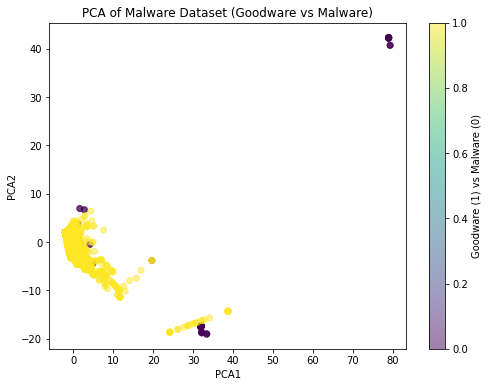

Explained variance by each component: [0.26691148 0.09703949]


In [50]:
# visualize the PCA result
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_df['PCA1'], X_pca_df['PCA2'], c=y_final['Label_goodware'], cmap='viridis', alpha=0.5)
plt.title('PCA of Malware Dataset (Goodware vs Malware)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Goodware (1) vs Malware (0)')
plt.show()

# Check the explained variance to understand how much variance is captured by the components
print(f"Explained variance by each component: {pca.explained_variance_ratio_}")

The PCA plot shows two clusters of points, suggesting that malware and goodware instances are well separated. Yellow points are goodware and darker purple points are malware. The first PCA explains 39.99% of the variance and the second component explains 12.9%. Together, they account for 52.89% of the total variance in the dataset. This means, that while PCA1 captures a significant portion of the structure in the data, additional components would be needed to capture more variance. Since PCA1 captures the most variaance, we will analyze which original features contribute the most and use that to refine feature selection. Given the strong separation between malware and goodware in these two dimensions, ML models should be able to classify them effectively. 

In [51]:
# Create a DataFrame of feature contributions (loadings)
pca_loadings = pd.DataFrame(pca.components_.T, 
                            columns=['PCA1', 'PCA2'], 
                            index=X_final.columns)

# Sort by absolute contribution to PCA1
top_features = pca_loadings['PCA1'].abs().sort_values(ascending=False)

# Display the top 10 contributing features
print(top_features.head(10))


PERSISTENT_ACTIVITY               0.143314
ACCESS_LOCATION_EXTRA_COMMANDS    0.141736
WRITE_USER_DICTIONARY             0.140904
REORDER_TASKS                     0.136610
EXPAND_STATUS_BAR                 0.136258
READ_USER_DICTIONARY              0.136161
SET_WALLPAPER_HINTS               0.134378
MOUNT_FORMAT_FILESYSTEMS          0.133775
CHANGE_CONFIGURATION              0.133142
RECEIVE_WAP_PUSH                  0.132142
Name: PCA1, dtype: float64


PCA1 reveals that many of these features relate to critical Android system access points like audio, VPNs, SMS, etc. Malware can exploit such permissions for spying and fraud. Features such as CAPTURE_AUDIO_OUTPUT, BIND_INPUT_METHOD, and BROADCAST_SMS are associated with spyware, generally. Since PCA1 captures the most variance, these permissions might be strong predictors of malware/goodware classification, so feature engineering efforts can focus on these to improve model performance. 

Since PCA is unsupervised, the use of Label_goodware and Label_malware does not directly affect dimensionality reduction process because PCA focuses on feature variance rather than target labels. For modeling, however, we will only use a single target - since Label_goodware and Label_malware contain the same information but inverse of each other, we will focus on Label_malware for the purposes of our exploration. 

### 3. Outline and justify a strategy for splitting the dataset into training, validation, and test sets, considering any potential class imbalance and the dataset’s characteristics

After implemeting SMOTE, it is important to maintain the balance between model performance and ensuring that it is generalizable on unseen data. The inital split is a majority (70%) used for training, allowing the model to learn from a substantial portion of the data while incorporating artificial samples from SMOTE for the minority class. The remaining 30% of the dataset will be reserved for the test set. We implement a stratified split on the dataset where each class is equally represented in both training and test sets. One key issue is that SMOTE can artifically inflate model performance on the test set, distorting our model's generalizability. 